# Import Libraries

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Collection & Preprocessing

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.shape

(1338, 7)

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


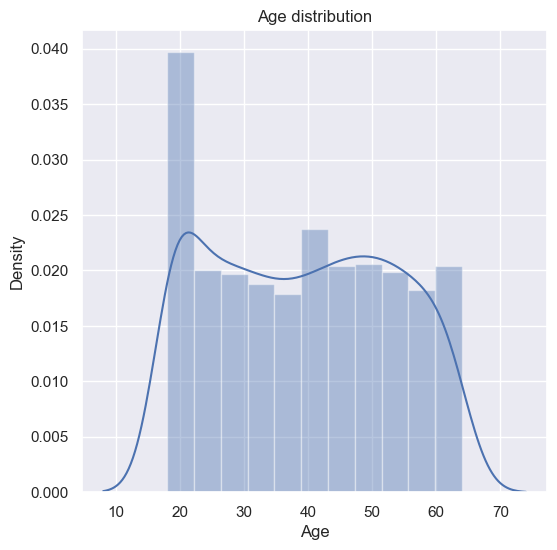

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

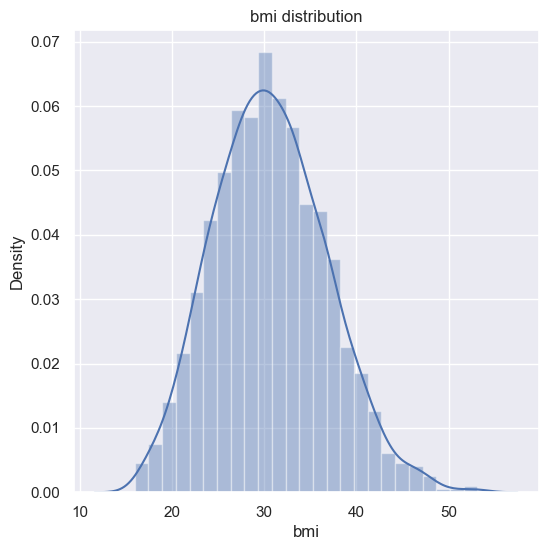

In [19]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('bmi distribution')
plt.xlabel('bmi')
plt.show()

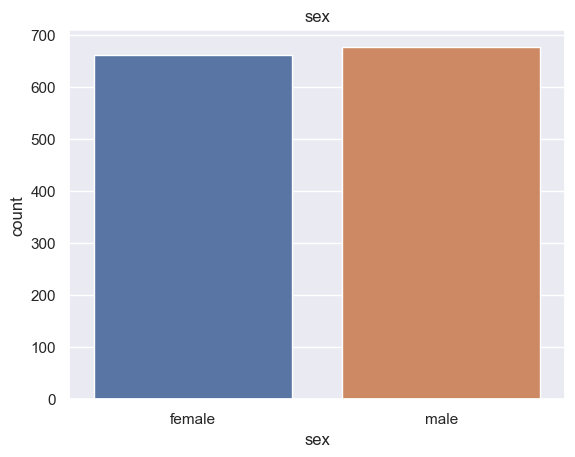

In [33]:
sns.countplot(data,x='sex')
plt.title('sex')
plt.show()

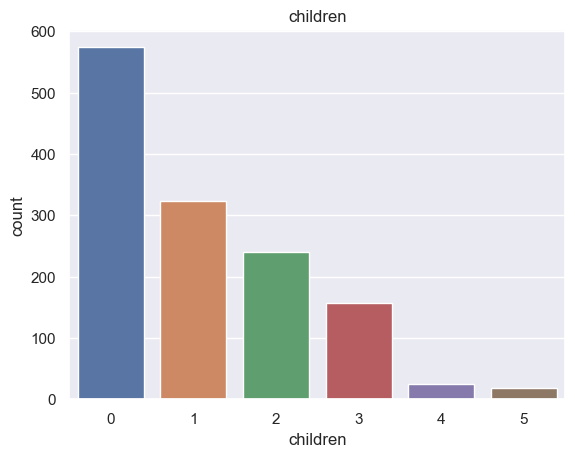

In [30]:
sns.countplot(data,x='children')
plt.title('children')
plt.show()

In [31]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

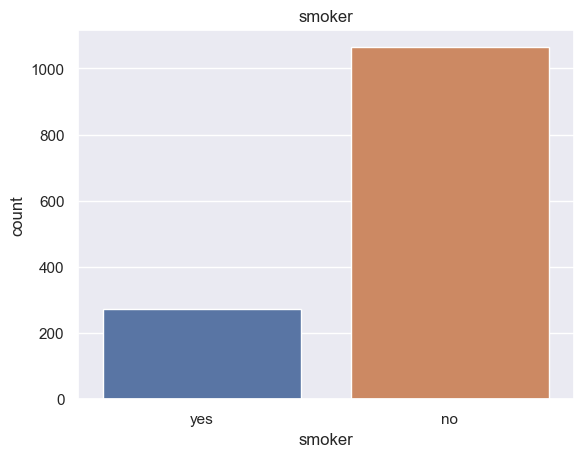

In [32]:
sns.countplot(data,x='smoker')
plt.title('smoker')
plt.show()

In [34]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

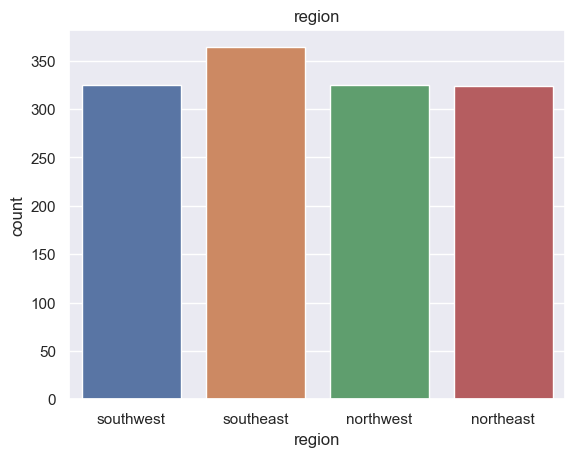

In [35]:
sns.countplot(data,x='region')
plt.title('region')
plt.show()

In [36]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

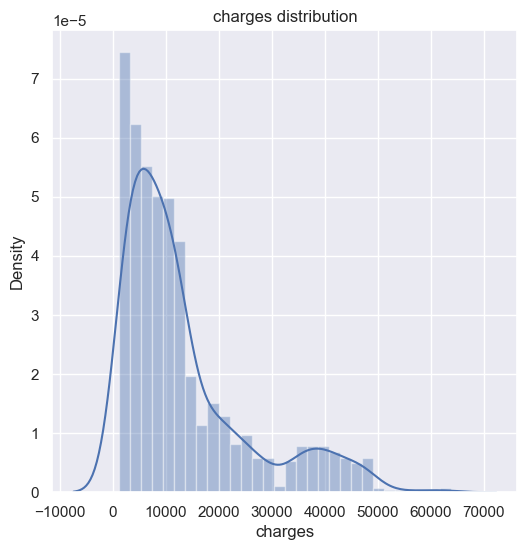

In [37]:

plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('charges distribution')
plt.show()

In [39]:
data.replace({'sex':{'male':0,'female':1},
             'smoker':{'yes':0,'no':1},
              'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}
             },inplace=True)

In [40]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# 

# Separating Features & Target variable

In [41]:
x=data.drop('charges',axis=1)
y=data['charges']

In [42]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [43]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# 

# Creating Train & Test Data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(1338, 6)
(1070, 6)
(268, 6)


# 

# Model Training

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model=LinearRegression()

In [49]:
model.fit(x_train,y_train)

LinearRegression()

In [52]:
train_pred=model.predict(x_train)

# 

# Performance Evalution

In [53]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_train,train_pred)

0.7413131194887537

In [56]:
test_pred=model.predict(x_test)

In [57]:
r2_score(y_test,test_pred)

0.783021587162344

# 

# Building Predictive System

In [76]:
test_query=data.iloc[,:-1].values.reshape(1,-1)
test_query

array([[32.  ,  0.  , 28.88,  0.  ,  1.  ,  3.  ]])

In [77]:
prediction=model.predict(test_query)
print('Charges : ',prediction[0])

Charges :  5806.097817505889
